## Data analysis using Python: Understanding cosmetics sales

The wholesaler Beauty Blend, after a market analysis decided to buy the distributor Très Belle, a small size company that had been having management problems and was put on sale to avoid its bankruptcy and the owners not to have greater losses.

The first quarter of 2022 was Très Belle's last period on the market. During April there was a restructuring of the teams, where Beauty Blend opted to keep the commercial team and decided that it will return with the sales of products previously marketed by Très Belle from the third quarter of the year.

Before modeling the business strategy for the third and fourth quarter of 2022, it will be necessary to observe the behavior of the old company, especially look products and prices avaliable in our sample:

In [2]:
#bringing packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_excel('cosmetics.xlsx')

### Importing data:

In [21]:
data.head()

,id,Product,Manufacturer,value_price,qtd,sales_person,country,Packaging,Month,Buyer,Consumer_target
0,1,Mango Lipbalm,Nina Beauty,76.49,771,Felizio Barlass,United Kingdom,Deluxe,Jan,Stunning girl S.A,Girls
1,2,Anti Aging BBCream,Breeze way,15.92,360,Theresa Faraday,Germany,Normal,Feb,Cool Woman S.A,Women 40+
2,3,Royal handcream,Haus of Bella,85.29,699,Raquel O'Dunneen,Netherlands,Deluxe,Jan,Female Brands S.A,Women 40+
3,4,Doll Age-Defying Liquid Foundation,Haus of Bella,21.58,125,Felizio Barlass,France,Normal,Jan,Cool Woman S.A,Women 40+
4,5,Topcare Daily Facial,Breeze way,97.56,881,Theresa Faraday,Sweden,Normal,Jan,Cool Woman S.A,Young Women


### Observing data characteristics

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2000 non-null   int64  
 1   Product          2000 non-null   object 
 2   Manufacturer     2000 non-null   object 
 3   value_price      2000 non-null   float64
 4   qtd              2000 non-null   int64  
 5   sales_person     2000 non-null   object 
 6   country          2000 non-null   object 
 7   Packaging        2000 non-null   object 
 8   Month            2000 non-null   object 
 9   Buyer            2000 non-null   object 
 10  Consumer_target  2000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 172.0+ KB


In [23]:
#checking if there's any null
data.isnull().sum()

id                 0
Product            0
Manufacturer       0
value_price        0
qtd                0
sales_person       0
country            0
Packaging          0
Month              0
Buyer              0
Consumer_target    0
dtype: int64

In [24]:
data.dtypes.value_counts()

object     8
int64      2
float64    1
dtype: int64

### Exploratory Analysis

Let's check descriptive statistics of the variables:

In [25]:
data.describe()

,id,value_price,qtd
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,53.290665,500.955500
std,577.494589,24.187996,217.445561
min,1.000000,6.700000,72.000000
25%,500.750000,35.637500,345.000000
50%,1000.500000,50.285000,467.000000
75%,1500.250000,68.870000,628.000000
max,2000.000000,152.900000,1611.000000


In [26]:
data['Product'].value_counts()

Suntannnig Bronzer FPS8               354
Topcare Daily Facial                  301
Miraculous Lip Tint                   295
Royal handcream                       275
Anti Aging BBCream                    267
Mango Lipbalm                         259
Doll Age-Defying Liquid Foundation    249
Name: Product, dtype: int64

The product with the highest output (number of successful proposals) is Suntannnig Bronzer FPS8, something curious given that in Europe the first quarter is marked by low temperatures 

In [27]:
data['Manufacturer'].value_counts()

Breeze way       922
Nina Beauty      554
Haus of Bella    524
Name: Manufacturer, dtype: int64

In [28]:
data['sales_person'].value_counts()

Theresa Faraday     963
Felizio Barlass     519
Raquel O'Dunneen    518
Name: sales_person, dtype: int64

In [29]:
data['country'].value_counts()

United Kingdom    417
Germany           417
Netherlands       417
France            416
Sweden            333
Name: country, dtype: int64

In [30]:
data['Packaging'].value_counts()

Normal    1158
Deluxe     842
Name: Packaging, dtype: int64

In [31]:
data['Month'].value_counts()

Jan    690
Mar    674
Feb    636
Name: Month, dtype: int64

In [32]:
data['Buyer'].value_counts()

Cool Woman S.A       805
Female Brands S.A    610
Stunning girl S.A    585
Name: Buyer, dtype: int64

In [33]:
data['Consumer_target'].value_counts()

Young Women    950
Women 40+      791
Girls          259
Name: Consumer_target, dtype: int64

Until now, we could check the relationship between the main product offered to the buyers (Suntannnig Bronzer FPS8), with the main public target by quantity (Young Girls).

Another important observation is to verify what products each manufacturer does:

In [34]:
data.groupby('Manufacturer')['Product'].value_counts()

Manufacturer   Product                           
Breeze way     Suntannnig Bronzer FPS8               354
               Topcare Daily Facial                  301
               Anti Aging BBCream                    267
Haus of Bella  Royal handcream                       275
               Doll Age-Defying Liquid Foundation    249
Nina Beauty    Miraculous Lip Tint                   295
               Mango Lipbalm                         259
Name: Product, dtype: int64

In [35]:
data.groupby('Buyer')['Product'].value_counts()

Buyer              Product                           
Cool Woman S.A     Suntannnig Bronzer FPS8               134
                   Topcare Daily Facial                  126
                   Mango Lipbalm                         120
                   Miraculous Lip Tint                   119
                   Anti Aging BBCream                    106
                   Doll Age-Defying Liquid Foundation    102
                   Royal handcream                        98
Female Brands S.A  Suntannnig Bronzer FPS8               123
                   Royal handcream                        92
                   Miraculous Lip Tint                    91
                   Doll Age-Defying Liquid Foundation     82
                   Anti Aging BBCream                     81
                   Topcare Daily Facial                   79
                   Mango Lipbalm                          62
Stunning girl S.A  Suntannnig Bronzer FPS8                97
                   Topcare Dail

### Analyzing quantitative variables

An interesting thing is to observe the maximun and minimum values from each quantitvative variable

In [36]:
data.query('value_price == 152.900000')

,id,Product,Manufacturer,value_price,qtd,sales_person,country,Packaging,Month,Buyer,Consumer_target
218,219,Mango Lipbalm,Nina Beauty,152.9,1611,Raquel O'Dunneen,Netherlands,Deluxe,Mar,Stunning girl S.A,Girls


In [37]:
data.query('value_price == 6.700000')

,id,Product,Manufacturer,value_price,qtd,sales_person,country,Packaging,Month,Buyer,Consumer_target
904,905,Mango Lipbalm,Nina Beauty,6.7,195,Raquel O'Dunneen,Germany,Normal,Jan,Cool Woman S.A,Girls


Here we have a point of attention: both the maximum and minimum values refer to the same product, indicating some systemic error in pricing or some not very common sales strategy, requiring an analysis of marketing strategies or if, in the case, it is about some campaign

In [38]:
data.query('qtd == 1611.000000')

,id,Product,Manufacturer,value_price,qtd,sales_person,country,Packaging,Month,Buyer,Consumer_target
218,219,Mango Lipbalm,Nina Beauty,152.90,1611,Raquel O'Dunneen,Netherlands,Deluxe,Mar,Stunning girl S.A,Girls
1918,1919,Topcare Daily Facial,Breeze way,46.16,1611,Theresa Faraday,Netherlands,Normal,Feb,Female Brands S.A,Young Women


We can confirm the first assumption, because we can see a more valuable product being selled for a lower price at the same country

In [39]:
data.query('qtd == 72.000000')

,id,Product,Manufacturer,value_price,qtd,sales_person,country,Packaging,Month,Buyer,Consumer_target
1397,1398,Suntannnig Bronzer FPS8,Breeze way,20.4,72,Theresa Faraday,United Kingdom,Deluxe,Feb,Stunning girl S.A,Young Women


### Data Visualization

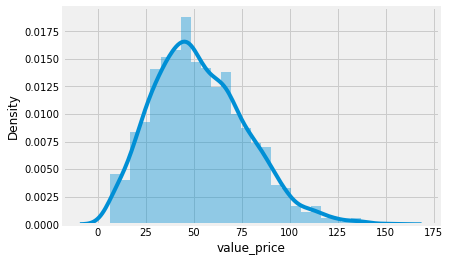

In [40]:
sns.distplot(data['value_price']);

In [41]:
print('distortion: %f' % data['value_price'].skew())
print('kurtosis: %f' % data['value_price'].kurt())

distortion: 0.527135
kurtosis: 0.153547


Since the kurtosis is less than 3, it seems that the wage data do not represent a normal distribution.

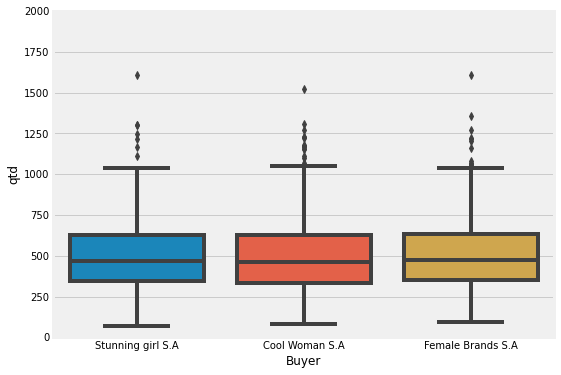

In [42]:
var = 'Buyer'
dt = pd.concat([data['qtd'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='qtd', data = dt)
fig.axis(ymin=0, ymax=2000.000000 );

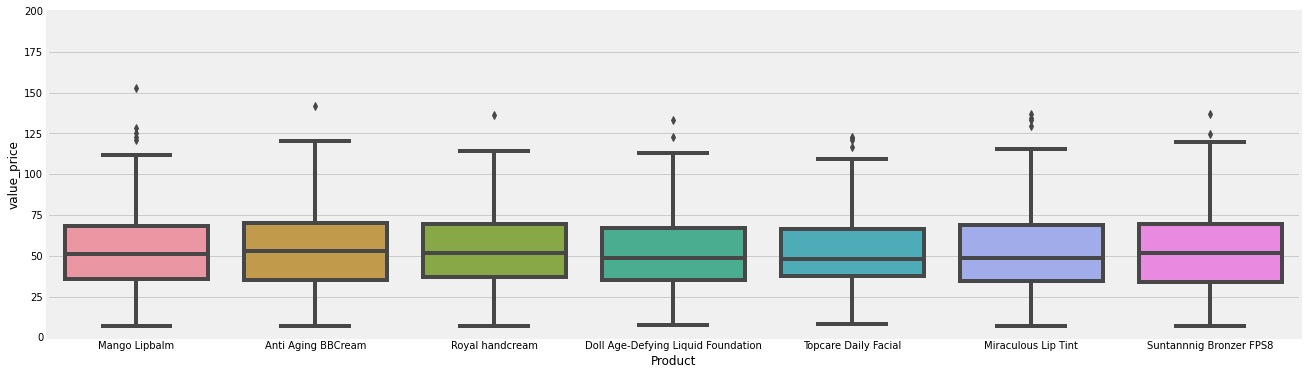

In [43]:
var = 'Product'
dt = pd.concat([data['value_price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,6))
fig = sns.boxplot(x=var, y='value_price', data = dt)
fig.axis(ymin=0, ymax=200.000000 );

Now let's analyze the average price of the products in the sales proposals made by Très Belle

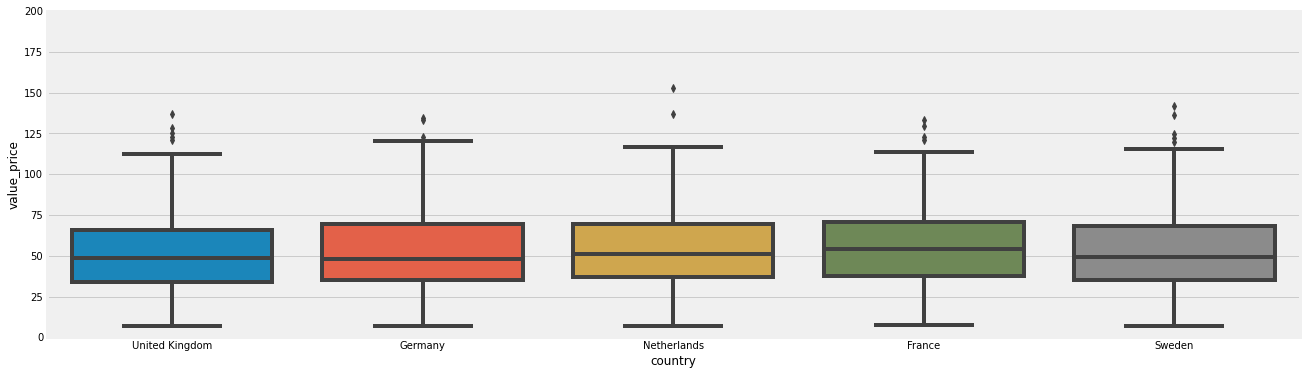

In [45]:
var = 'country'
dt = pd.concat([data['value_price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,6))
fig = sns.boxplot(x=var, y='value_price', data = dt)
fig.axis(ymin=0, ymax=200.000000 );

We notice that all products have similar medians, indicating a certain price pattern, even if they are products that enter the market in different categories, such as, for example, the Anti Aging BBCream which is an anti-aging product has an average unit value similar to the Miraculous LipTint which has only aesthetic purposes

Now let's look at the sales quantity by each country and each store:

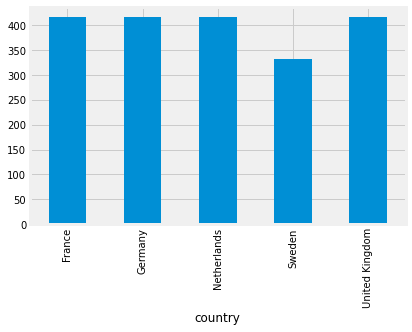

In [51]:
data.groupby('country')['value_price'].count().plot.bar();

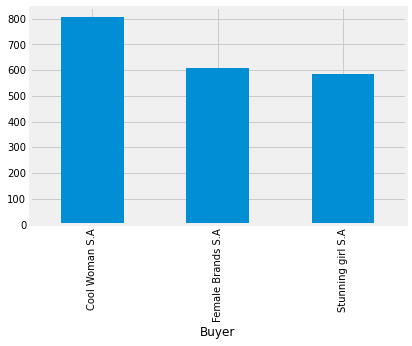

In [52]:
data.groupby('Buyer')['value_price'].count().plot.bar();

When we analyse Très Belle sales team performance, we can observe that Theresa Faraday has the best performance during the analyzed period and thus we can consider integrating her into our sales team

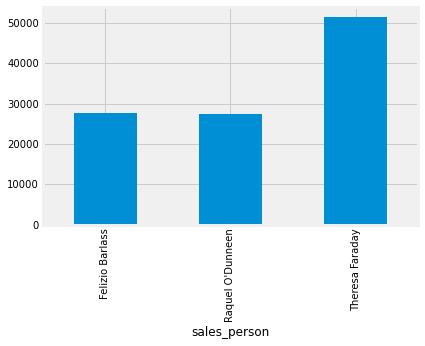

In [53]:
data.groupby('sales_person')['value_price'].sum().plot.bar();

Another important aspect of our analysis would be to verify which packaging brings more gains, since we once verified that products with normal packaging had more sales in quantity

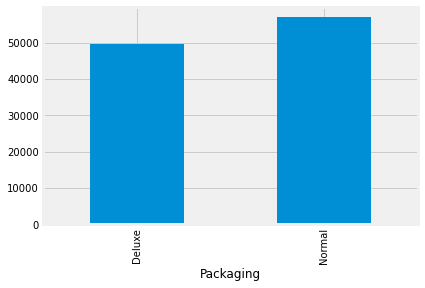

In [6]:
data.groupby('Packaging')['value_price'].sum().plot.bar();

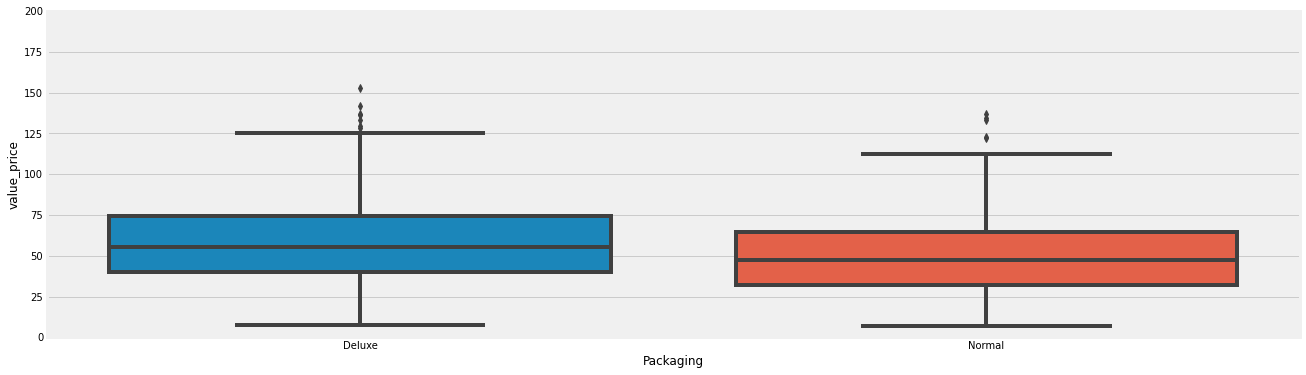

In [5]:
var_2 = 'Packaging'
dt = pd.concat([data['value_price'], data[var_2]], axis=1)
f, ax = plt.subplots(figsize=(20,6))
fig = sns.boxplot(x=var, y='value_price', data = dt)
fig.axis(ymin=0, ymax=200.000000 );

An interesting point when analyzing the packaging issue is the small difference when comparing the median of each type, generating a future opportunity to encourage the sale of products with deluxe packaging, to achieve a higher profit margin. 

Last but not least, let's verify which target audience we have the most gains:

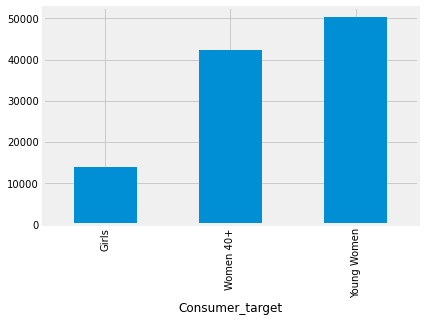

In [7]:
data.groupby('Consumer_target')['value_price'].sum().plot.bar();

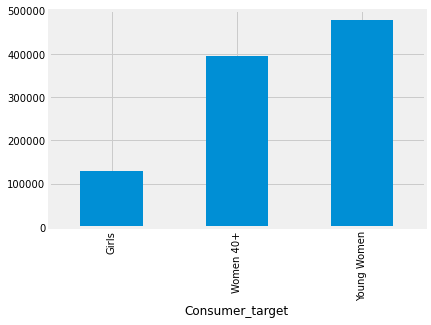

In [9]:
data.groupby('Consumer_target')['qtd'].sum().plot.bar();

As expected, the amount of products sold generally follows the value obtained in each target audience

### Conclusions:

The company had pricing problems with its products;

The sales volumes per salesperson indicate a certain lack of training, since one of the salespeople had a much higher performance than the others;

Need to create sales strategies per country;

Initially encourage, through discounts for example, a greater sale of products for girls;

As data don't follow a normal distribution, we'll need to make more in-depth analyses in order to draw a commercial strategy to leverage sales. Another important factor will be to analyze the company's stock, to understand certain sales figures, especially the outliers found in the database.

